In [276]:
import warnings
warnings.filterwarnings('ignore')

In [277]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [278]:

np.random.seed(42)
num_samples = 1000

In [279]:

X_class0 = np.random.normal(loc=[0, 0], scale=[1, 1], size=(num_samples, 2)) + np.array( [0.5,1] )
Y_class0 = np.zeros(num_samples)


X_class1 = np.random.normal(loc=[2, 2], scale=[1, 1], size=(num_samples, 2)) + np.array ( [1,1] )
Y_class1 = np.ones(num_samples) 

X = np.vstack((X_class0, X_class1))
Y = np.concatenate((Y_class0, Y_class1))


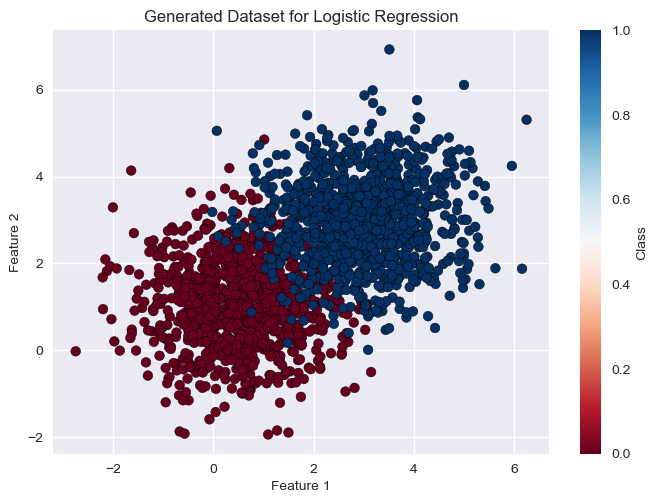

In [280]:

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset for Logistic Regression')
plt.colorbar(label='Class')
plt.show()

In [281]:
Y.shape

(2000,)

<img src = "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*dEZxrHeNGlhfNt-JyRLpig.png">

In [282]:
def logloss(y_true,y_pred) : 
    epsilon = 1e-20
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [283]:
def init_params(size) : 
    
    W = np.random.randn(size)
    b = 0 
    return W, b

In [284]:
w, b = init_params(2) 
print(w)

[-0.8634936  -0.03120349]


In [285]:
def sigmoid(z) : 
    return (1 / (1 + np.exp(-z)))

In [286]:
tmp = np.dot(w,X.T)
a = sigmoid(tmp)

(a - Y).shape

(2000,)

In [292]:
def logisticRegression(X_train,y_train, learning_rate = 0.8, max_epoch = 200) : 
    
    costs = []
    W,b = init_params(X_train.shape[-1]) 
    
    for epoch in range(max_epoch) : 
        
        z = np.dot(X_train,W.T) + b 
        a = sigmoid(z)
        
        loss = logloss(y_train,a)
        
        costs.append(loss)
        
        error = a - y_train
        
        dw = (1/len(X_train)) * np.dot(X_train.T,error) 
        db = (1/len(X_train)) * np.sum(error) 
        
        W -= learning_rate * dw
        b -= learning_rate * db
        
        if not ( epoch % 10 ):
            print(f"epoch {epoch} loss {loss}")
            
    return costs, W, b

In [293]:
costs,W,b = logisticRegression(X,Y)


epoch 0 loss 1.6838579121651431
epoch 10 loss 0.3782678676778078
epoch 20 loss 0.294321952819544
epoch 30 loss 0.25581016615788177
epoch 40 loss 0.23231742470167188
epoch 50 loss 0.216404125709061
epoch 60 loss 0.2049102402104133
epoch 70 loss 0.1962238123985147
epoch 80 loss 0.18943317820250027
epoch 90 loss 0.18398358181180893
epoch 100 loss 0.1795179306541519
epoch 110 loss 0.17579583755965042
epoch 120 loss 0.1726494561529449
epoch 130 loss 0.169957977514204
epoch 140 loss 0.1676321926430525
epoch 150 loss 0.1656047695838604
epoch 160 loss 0.16382391867575166
epoch 170 loss 0.16224914268616417
epoch 180 loss 0.16084831194174848
epoch 190 loss 0.15959560565083195


In [289]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = np.round(y_predicted)
    return y_predicted_cls

In [290]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = predict(np.c_[xx.ravel(), yy.ravel()], W, b)
Z = Z.reshape(xx.shape)

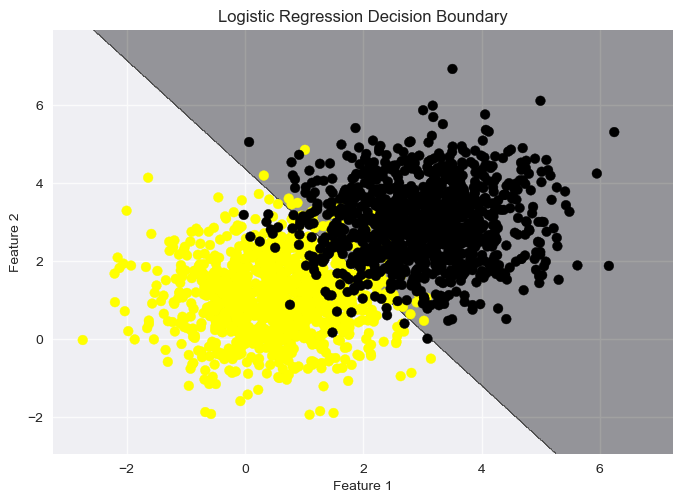

In [291]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.gnuplot_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

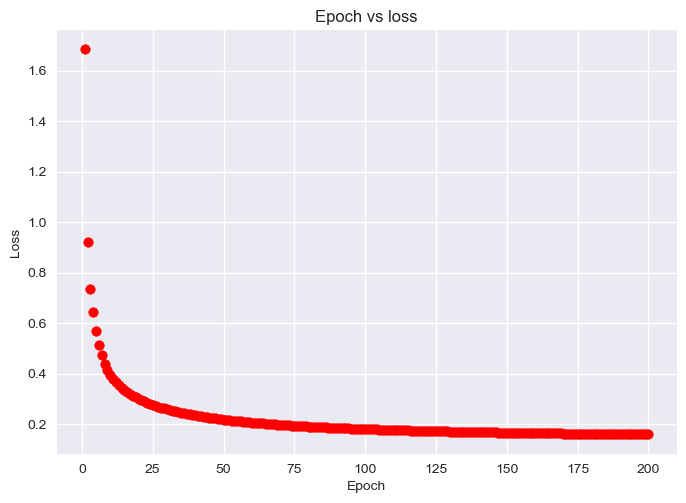

In [298]:
plt.scatter(list(range(1,len(costs)+1)),costs, color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs loss')
plt.show()